In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

### A.3
_Adiabatic P-V fit using non-linear least squares_  
  
  
**Findings:**
> Found that gas data read from pV_adiabatic.csv is likely monoatomic as fitted value for gamma is 1.671 +/- 0.005 and a monoatomic ideal gas is expected to have a gamma value of 1.666 or 5/3. A diatomic ideal gas would have a gamma of 1.4 of 7/5.

Optimized Coefficient Values: 
	Gamma: 1.671 +/- 0.005
	Lambda: 97 +/- 3


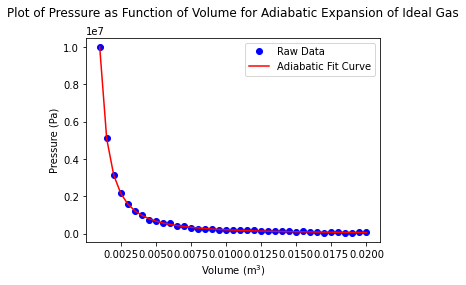

In [12]:

df = pd.read_csv('pV_adiabatic.csv', header=None)
Xs = df[0]
Ys = df[1]

raw_data, = plt.plot(Xs, Ys, 'ob')
plt.title("Plot of Pressure as Function of Volume for Adiabatic Expansion of Ideal Gas\n")
plt.xlabel("Volume")
plt.ylabel("Pressure")

def adiabatic(v, gamma, _lambda):
    p = _lambda / (v ** gamma)
    return p

g1 = ((5/3) + (7/5)) * 0.5
g2 = Xs[0] * Ys[0] ** g1

initial_guesses = [g1, g2]

popt, pcov = curve_fit(adiabatic, Xs, Ys, initial_guesses)
fit_curve, = plt.plot(Xs, adiabatic(Xs, *popt), 'r')
plt.legend([raw_data, fit_curve], ["Raw Data","Adiabatic Fit Curve"])
plt.tight_layout()
plt.ylabel("Pressure (Pa)")
plt.xlabel("Volume (m$^3$)")

perr = np.sqrt(np.diag(pcov))
print("Optimized Coefficient Values: \n\tGamma: {:.3f} +/- {:.3f}\n\tLambda: {:.0f} +/- {:.0f}".format(popt[0], perr[0], popt[1], perr[1]))


### B1
_VanDerWaals Gas Inspection_  

**Findings:**
> - A Van Der Waals Gas approaches +$\infty$ when V approaches $b^+$ while an ideal gas approaches +$\infty$ when V approaches 0   
- The attractive component of the Van Der Waals equation influences P significantly at low temperatures causing decreases in pressure at V slightly above the value of b before asymptotically shooting off to +$\infty$  
- Higher temperature Van Der Walls gasses appear most similar to ideal gasses
- As volume decreases overall shapes of the curves at high temperature mirror that of an ideal gas. At intermediate temperatures, the attractive and repulsive interactions start to dominate the behavior of the function and appear to cancel out much of the increase in pressure until sufficiently close to V = b where they approach +$\infty$. Low temperature isotherms are heavily influenced by the attractive component as the value of T is not large enough to overcome the value of $\frac{-a}{V^2}$ at V slightly larger than b.  
- At very low temperatures, the pressure appears to go below zero which likely indicates a breakdown of the VDW equation's usefulness as this is a physical impossibility.  
- At large V, all isotherms mimic the appearance of ideal gasses

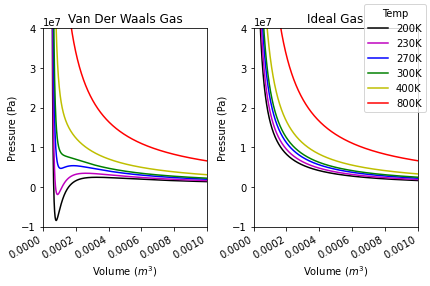

In [3]:
Ts = [200, 230, 270, 300, 400, 800] #in Kelvin
cols = ['k', 'm', 'b', 'g', 'y', 'r']
R = 8.3145
a = 0.3687 # in Pa * m^6 * mol ^-2
b = 4.62e-5 #in m^3 * mol^-1
n = 1

def VDW(V, T, n, a, b, R=R):
    p = ( (n*R*T) / (V - n*b) ) - ( (a * n ** 2) / (V ** 2) )
    return p

def ideal_gas(V, T, n, R=R): #
    p = n*R*T / V #
    return p #

Vs = np.linspace(1e-8, 1e-3, 1000)
Ps = [VDW(Vs, t, n, a, b) for t in Ts]
ideal_Ps = [ideal_gas(Vs, t, n) for t in Ts] #

fig, (ax1, ax2) = plt.subplots(1, 2)

for i, j in enumerate(Ps):
    masked_vdw = np.ma.masked_where(Vs < b, j) #Remove points less than b as pyplot connects points on both sides of discontinuity
    ax1.plot(Vs, masked_vdw, cols[i], label="{}K".format(Ts[i]))
for i, j in enumerate(ideal_Ps):
    ax2.plot(Vs, j, cols[i])

ax1.axis([0, 0.001, -1e7, 4e7])
ax1.set_title("Van Der Waals Gas")
ax1.set_xlabel("Volume ($m^3$)")
ax1.set_ylabel("Pressure (Pa)")

ax2.axis([0, 0.001, -1e7, 4e7])
ax2.set_title("Ideal Gas")
ax2.set_xlabel("Volume ($m^3$)")
ax2.set_ylabel("Pressure (Pa)")

fig.autofmt_xdate()
fig.legend(title="Temp")
fig.tight_layout()


### B2
_Compare VDW and Ideal 300 K isotherm_  

**Findings:**
> - The attractive component is negative and this responsible for decreases in pressure. It is independent of b and decreases towards $-\infty$ as V approaches zero. 
- The repulsive component is positive and responsible for an additional increase in pressure for a VDW gas compared to an ideal gas at small V. It is asymptotic reaching a maximum when V approaches $b^+$ and a minimum when V approaches $b^-$. Because it generates asymptotes around b, it is the reason that the VDW gas pressure approaches $+\infty$ when X approaches b.  
- The repulsive component is scaled by T and increased T leads to a steeper increase in pressure and cancels out more of the attractive component's influence especially around b.
- When summed, the arractive and repulsive components for the 300 K isotherm nearly cancel eachother out causing the near-constant pressure behavior until V is sufficiently close to b and the function shoots off to infinity  
- The result of all of this is that the van der waals equation approaches infinity at greater a V than the ideal gas equation. Furthermore, the VDW equation is able to account for the balance between attractive and repulsive interactions and thus when attractive interactions dominate, the P is below that of an ideal gas and when repulsive interactions dominate, the P is above that of an ideal gas.

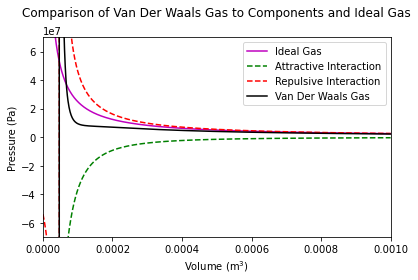

In [11]:
p_vdw = VDW(Vs, 300, 1, a, b)
p_ideal = ideal_gas(Vs, 300, 1)
p_second = VDW(Vs, 300, 1, a, b, 0)
p_first = VDW(Vs, 300, 1, 0, b)

ideal, = plt.plot(Vs, p_ideal, 'm')
attractive, = plt.plot(Vs, p_second, '--g')
repulsive, = plt.plot(Vs, p_first, '--r')
vanderwaals, = plt.plot(Vs, p_vdw, 'k')

plt.legend((ideal, attractive, repulsive, vanderwaals), ("Ideal Gas", "Attractive Interaction", "Repulsive Interaction", "Van Der Waals Gas"))
plt.axis([0, 0.001, -7e7, 7e7]) 
fig.autofmt_xdate()
plt.title("Comparison of Van Der Waals Gas to Components and Ideal Gas\n")
plt.ylabel("Pressure (Pa)")
plt.xlabel("Volume (m$^3$)")

plt.tight_layout()